<a href="https://colab.research.google.com/github/nada-ali1711/Markov-Decision-Processes/blob/main/Markov_Decision_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Markov Decision Processes**



*   Abdelrahman Khayri Saad 19015906
*   Mariam Mohammed Ahmed Osman 19017274
*   Mariam Tarek Mostafa Omar 19016637
*   Nada Ali Hassan Ahmed 19016781


---



1.   **Problem Statement**:
<br>
you are required to implement value and policy iteration to 3x3 grid,The agent has four actions Up, Down, Right and Left.
The transition model is: 80% of the time the agent goes in the direction it selects; the rest of
the time it moves at right angles to the intended direction. A collision with a wall results in no
movement. 


2.   **Algorithms**: <br>
Algorithms used in this assignment:<br> 
1-Value iteration :<br> 

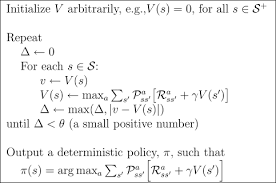<br> 
 2-Policy  iteration :<br> 
 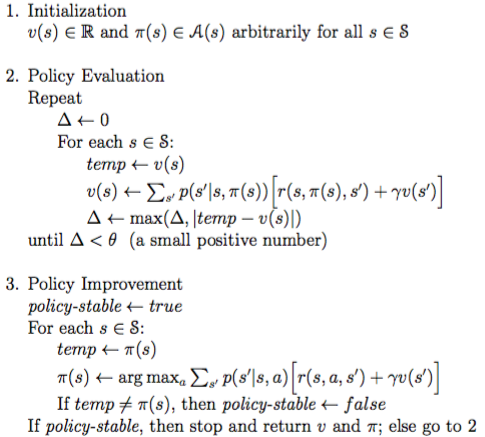


3.   **Data structures**<br>
     1- Dictionary <br>
     2-Lists <br>
     3-Arrays<br> 
4.   **IDeas** <br> 
     Assume that the initial value for each state is zero .<br> 
     Assume the value of the terminal states is always zero












**in case R=100**<br>
  1- Value iteration result 






In [ ]:
va = ValueIeraion(100, 0.99, 0.000001)
va.value_iteration()


['', 'L', '']
['U', 'L', 'D']
['U', 'L', 'L']


2- Policy iteration Result :

In [ ]:
testR = 100
#print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()

Optimal Policy:
['None', 'Left', 'None']
['Up', 'Left', 'Down']
['Up', 'Left', 'Left']



As it's shown in case R is a large positive value, the action of each state is trying to raech the state with the 100 reward and just ignore the +10 reward because +100 is more valuable.

**when R=3**<br>
1- Value iteration result

In [ ]:
va = ValueIeraion(3, 0.99, 0.000001)
va.value_iteration()

['', 'R', '']
['R', 'R', 'U']
['R', 'R', 'U']


2-Policy iteration :

In [ ]:
testR = 3
#print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()

Optimal Policy:
['None', 'Right', 'None']
['Right', 'Right', 'Up']
['Right', 'Right', 'Up']



When R is a small positive value,the action of each state is trying to achieve the +10 result and just ignore the +3 Reward because +10 is more valuable

**When R = 0**<br>
1-Value iteration:


In [ ]:
va = ValueIeraion(0, 0.99, 0.000001)
va.value_iteration()

['', 'R', '']
['R', 'R', 'U']
['R', 'R', 'U']


2-policy iteration : 

In [ ]:
testR = 0
#print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()

Optimal Policy:
['None', 'Right', 'None']
['Right', 'Right', 'Up']
['Right', 'Right', 'Up']



same as the prevoius case ,When R is a small positive value,the action of each state is trying to achieve the +10 result and just ignore the 0 Reward because +10 is more valuable

**When R=-3**<br> 
1-Value iteration: 

In [ ]:
va = ValueIeraion(-3, 0.99, 0.000001)
va.value_iteration()

[': 0.0', 'R: 9.557514390731823', ': 0.0']
['R: 5.841446673200822', 'R: 8.195156364470071', 'U: 9.557514390731823']
['R: 5.564474653619667', 'R: 6.862738360317547', 'U: 8.04546329557115']


2-Policy Iteration : 

In [ ]:
testR = -3
#print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()

NameError: ignored

same as the prevoius case ,When R is a  negative value,the action of each state is trying to achieve the +10 result and just ignore the -3 Reward because +10 is more valuable

# **Algorithms Implementation:**

In [ ]:
import numpy as np

In [ ]:
class ValueIeraion():


  grid = [[0, -1, 10], [-1, -1 ,-1], [-1, -1, -1]]
  actions = {'U','D','L','R'}


  def __init__(self, r,  gamma, convergance_ratio):
    self.gamma = gamma;
    self.convergance_ratio = convergance_ratio
    self.grid[0][0] = r

  def get_rewards(self):
    rewards = [ [-1]*5 for i in range(5)]
    rewards[1][3] = self.grid[0][2] 
    rewards[1][1]= self.grid[0][0] 
    for i in range (5) : 
      rewards[0][i]=rewards[1][i] 
      rewards[i][0]=rewards[i][1] 
      rewards[4][i]=rewards[3][i] 
      rewards[i][4]=rewards[i][3] 
    return rewards



  
  def value_iteration(self):
    v= np.zeros((5,5))
    rewards = self.get_rewards()
    states=[]
    for i in range(1,4):
        for j in range(1,4):
          if (i == 1 and j == 1) or (i == 1 and j == 3):
            continue
          else:
            states.append((i,j)) 
    gamma = self.gamma
    convergance_ratio=self.convergance_ratio

    policy= [ [""]*3 for i in range(3)] 

    v_old=v.copy()
    while(True):

        max_change=0;
        v_old = v.copy()
        for s in states:
            i=s[0]
            j=s[1]
            tmp1 = tmp2 = tmp3 = tmp4 = 0
            for a in self.actions:

                if (a=='U'):
                  tmp1= 0.8*(v_old[i-1][j]*gamma+rewards[i-1][j])+0.1*(v_old[i][j+1]*gamma+rewards[i][j+1])+0.1*(v_old[i][j-1] *gamma+rewards[i][j-1])
                if (a=='D') :
                  tmp2= 0.8*(v_old[i+1][j]*gamma+rewards[i+1][j])+0.1*(v_old[i][j+1]*gamma +rewards[i][j+1])+0.1*(v_old[i][j-1]*gamma+rewards[i][j-1])
                if (a=='L') :
                  tmp3= 0.8*(v_old[i][j-1]*gamma+rewards[i][j-1])+0.1*(v_old[i+1][j]*gamma +rewards[i+1][j])+0.1*(v_old[i-1][j]*gamma+rewards[i-1][j])
                if (a=='R'):
                  tmp4= 0.8*(v_old[i][j+1]*gamma+rewards[i][j+1])+0.1*(v_old[i+1][j]*gamma+rewards[i+1][j])+0.1*(v_old[i-1][j]*gamma +rewards[i-1][j])

            dicthelp={tmp1:'U',tmp2:'D',tmp3:'L',tmp4:'R'}
            max_policy=max(max(tmp1,tmp2),max(tmp3,tmp4)) 
            policy[i-1][j-1]=dicthelp[max_policy]
            v[i][j]= max_policy 
            
            max_change = max(max_change, abs(v_old[i][j] - v[i][j]) ) 


            for i in range (5) :
              v[0][i]=v[1][i] 
              v[i][0]=v[i][1] 
              v[4][i]=v[3][i] 
              v[i][4]=v[i][3]  
       
        if(max_change < self.convergance_ratio):
          for i in range (3):
            for j in range (3):
              policy[i][j] = policy[i][j] +": " + str(v[i+1][j+1])
          for p in policy:
              print(p)
          break;  



va = ValueIeraion(100, 0.99, 0.000001)
va.value_iteration()
va = ValueIeraion(3, 0.99, 0.000001)
va.value_iteration()
va = ValueIeraion(0, 0.99, 0.000001)
va.value_iteration()
va = ValueIeraion(-3, 0.99, 0.000001)
va.value_iteration()

[': 0.0', 'L: 99.19548075208951', ': 0.0']
['U: 99.19548075208951', 'L: 96.71846628158869', 'D: 90.10531338240727']
['U: 96.44629709651836', 'L: 94.29588836591856', 'L: 91.67898937017941']
[': 0.0', 'R: 9.55751439484235', ': 0.0']
['R: 6.448045245784484', 'R: 8.195156380683915', 'U: 9.55751439484235']
['R: 5.631126533317234', 'R: 6.86273840353223', 'U: 8.045463314853999']
[': 0.0', 'R: 9.557514391770614', ': 0.0']
['R: 6.144745948036507', 'R: 8.195156368566948', 'U: 9.557514391770614']
['R: 5.597800568899515', 'R: 6.862738371238265', 'U: 8.045463300443641']
[': 0.0', 'R: 9.557514390731823', ': 0.0']
['R: 5.841446673200822', 'R: 8.195156364470071', 'U: 9.557514390731823']
['R: 5.564474653619667', 'R: 6.862738360317547', 'U: 8.04546329557115']


In [ ]:


gamma: float = 0.99
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

class State:
	loc: tuple
	reward: int
	actions: dict = {}


	def __init__(self, loc: tuple) -> None:
		self.loc = loc
		self.build_actions()
	
	def __str__(self) -> str:
		return str(self.reward)

	def build_actions(self) -> None:
		self.actions = {}
		if self.loc[1] == 0 and (self.loc[0] == 0 or self.loc[0] == 2):
			return
		
		self.actions[LEFT] = self.action_results(LEFT)
		self.actions[RIGHT] = self.action_results(RIGHT)
		self.actions[UP] = self.action_results(UP)
		self.actions[DOWN] = self.action_results(DOWN)
	

	def action_results(self, a) -> list:
		leftLoc = (max(self.loc[0]-1, 0), self.loc[1])
		rightLoc = (min(self.loc[0]+1, 2), self.loc[1])
		upLoc = (self.loc[0], max(self.loc[1]-1, 0))
		downLoc = (self.loc[0], min(self.loc[1]+1, 2))
		result: list = []
		if a == LEFT:
			result.append(ActionResult(0.8, leftLoc))
			result.append(ActionResult(0.1, upLoc))
			result.append(ActionResult(0.1, downLoc))
		elif a == RIGHT:
			result.append(ActionResult(0.8, rightLoc))
			result.append(ActionResult(0.1, upLoc))
			result.append(ActionResult(0.1, downLoc))
		elif a == UP:
			result.append(ActionResult(0.8, upLoc))
			result.append(ActionResult(0.1, leftLoc))
			result.append(ActionResult(0.1, rightLoc))
		elif a == DOWN:
			result.append(ActionResult(0.8, downLoc))
			result.append(ActionResult(0.1, leftLoc))
			result.append(ActionResult(0.1, rightLoc))
		return result

	def get_state_utility(self, action: int, board: list, statesUtils: list) -> float:
		if len(self.actions) == 0: return 0
		utility: float = 0
		i: ActionResult = None
		results: list = self.actions[action]
		for i in results: #Checking each possible result of an action
			nextLoc: tuple = i.resultLoc
			nextStatePrevUtil = statesUtils[nextLoc[0] + 3*nextLoc[1]]
			utility += i.chance * (board[nextLoc[0]][nextLoc[1]].reward + gamma*nextStatePrevUtil)
		return utility


class ActionResult:
	resultLoc: tuple
	chance: float

	def __init__(self, chance: float, resultLoc: tuple) -> None:
		self.resultLoc = resultLoc
		self.chance = chance



def policyIteration(r: int) -> tuple:
	statesGrid: list = []

	for x in range(3):
		col: list = []
		for y in range(3):
			newSquare: State = State((x,y))
			newSquare.reward = -1
			
			col.append(newSquare)
		statesGrid.append(col)
	
	statesGrid[0][0].reward = r
	statesGrid[2][0].reward = 10
	previousIterationPolicies: list = [
		None, LEFT, None,
		UP, LEFT, DOWN,
		UP, LEFT, LEFT];
	previousIterationUtilities = converge_policy_utilities(statesGrid, previousIterationPolicies)
	converged: bool = False
	while not converged: #Policy iteration loop
		newPolicies: list = [None] * 9
		newUtilities: list = [None] * 9
		
		for x in range(3):
			for y in range(3): #States loop
				state: State = statesGrid[x][y]
				if len(state.actions) == 0:
					newPolicies[x + 3*y] = None
					newUtilities[x + 3*y] = 0
					continue
				
				utilities: dict = {}
				for action in state.actions: #Going through each action in a state
					utilities[action] = state.get_state_utility(action, statesGrid, previousIterationUtilities)
				newPolicies[x + 3*y] = max(utilities, key=utilities.get)
				newUtilities[x + 3*y] = max(utilities.values())
		
		converged = True
		for i in range(9):
			oldPolicy = previousIterationPolicies[i]
			newPolicy = newPolicies[i]
			if oldPolicy != newPolicy: 
				converged = False
				break
		previousIterationPolicies = newPolicies
		if not converged:
			previousIterationUtilities = converge_policy_utilities(statesGrid, previousIterationPolicies, newUtilities)
		else: previousIterationUtilities = newUtilities
	
	return previousIterationPolicies, previousIterationUtilities


def converge_policy_utilities(board: list, policies: list, initialUtils: list = [0]*9, converganceThreshold: float = 0.001) -> list:
	currentError = 1
	while currentError > converganceThreshold:
		nextUtils: list = [0] * 9
		for x in range(3):
			for y in range(3):#States loop
				state: State = board[x][y]
				action: int  = policies[x + 3*y]
				nextUtils[x + 3*y] = state.get_state_utility(action, board, initialUtils)
		maxNew: float  = max(nextUtils)
		maxOld: float = max(initialUtils)
		maxNew = maxNew if nextUtils.count(maxNew) else maxNew*-1
		maxOld = maxOld if nextUtils.count(maxOld) else maxOld*-1
		
		currentError = abs(maxNew - maxOld)
		initialUtils = nextUtils
	return initialUtils



In [ ]:

def print_policy(policies: list, utilities: list) -> None:
	print("Optimal Policy:")
	for y in range(3):
		row: list = []
		for x in range(3):
			policy: int = policies[x + 3*y]
			util: float = utilities[x + 3*y]
			if policy == LEFT:
				string = "Left"
			elif policy == RIGHT:
				string = "Right"
			elif policy == UP:
				string = "Up"
			elif policy == DOWN:
				string = "Down"
			else:
				string = "None"
			string = string #+ str(util)
			row.append(string)
		print(row)


testR = 100
print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()


testR = 3
print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()


testR = 0
print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()


testR = -3
print("r = " + str(testR))
optimalPolicies, optimalUtilities = policyIteration(testR)
print_policy(optimalPolicies, optimalUtilities)
print()
		


r = 100


NameError: ignored